In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML

In [2]:
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon", "iso"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade", "gekko"},
             "controller": {"brimstone", "omen", "viper", "astra", "harbor"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber", "deadlock"}}
allagents = set()
for role, l in roles.items():
    allagents = allagents.union(set(l))

In [3]:
players_stats = pd.read_csv("../../vct-erdos-project/data/vct_2022/players_stats/players_stats.csv")
overview = pd.read_csv("../../vct-erdos-project/data/vct_2022/matches/overview.csv")
maps_scores = pd.read_csv("../../vct-erdos-project/data/vct_2022/matches/maps_scores.csv")

In [4]:
len(players_stats[players_stats["Rating"].isna()])

135

In [5]:
players_stats = players_stats[['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents', 'Rating']]

players_stats["Agents"] = players_stats["Agents"].apply(lambda x: x.replace(" ", ""))

players_stats

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
0,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,astra,1.18
1,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,omen,0.82
2,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,sova,0.74
3,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,"omen,astra,sova",0.92
4,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,nAts,M3 Champions,chamber,1.97
...,...,...,...,...,...,...,...
121938,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,fatality,feelmyhack,viper,1.06
121939,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,fatality,feelmyhack,"viper,sova",1.13
121940,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,sk0dna,feelmyhack,sova,0.83
121941,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,sk0dna,feelmyhack,viper,0.62


In [6]:
players_stats = players_stats[players_stats.Agents.isin(allagents)]
players_stats

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
0,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,astra,1.18
1,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,omen,0.82
2,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Redgar,M3 Champions,sova,0.74
4,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,nAts,M3 Champions,chamber,1.97
5,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,nAts,M3 Champions,cypher,1.22
...,...,...,...,...,...,...,...
121936,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,Picik,feelmyhack,sage,1.03
121937,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,fatality,feelmyhack,sova,1.20
121938,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,fatality,feelmyhack,viper,1.06
121940,Champions Tour CIS Stage 1: Challengers 1,All Stages,All Match Types,sk0dna,feelmyhack,sova,0.83


In [7]:
players_stats["Rating"].isna().sum()

121

In [8]:
grouped1 = players_stats.groupby(["Player", "Team", "Agents"])

In [9]:
players_stats.loc[:,"Rating"] = grouped1["Rating"].transform(lambda x: x.fillna(x.mean()))


In [10]:
players_stats.Rating.isna().sum()

64

We still have some missing ratings.  Fill these with players' average rating.


In [11]:
grouped2 = players_stats.groupby(["Player", "Team"])
players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()

/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_18280/2949298896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))


22

There are still some missing ratings.  Fill them with team's average rating.


In [12]:
grouped3 = players_stats.groupby(["Team"])
players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()

/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_18280/4266454744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))


12

I will drop this 12 rows.

In [15]:
players_stats = players_stats[~players_stats.Rating.isna()]

In [17]:
players_stats.sort_values(by=["Rating"], ascending=False).head(20)

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
93970,Champions Tour CIS Stage 1: Challengers 2,Open Qualifier,Round of 64,RHEA,next_viigraem,omen,2.69
114469,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 64,marteen,Straight Outta Retirement,raze,2.67
101886,Champions Tour Europe Stage 1: Challengers 2,Open Qualifier,Round of 128,Dev0,Human Tripwires,raze,2.55
110691,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,speedy,Dame Time,raze,2.42
68926,Champions Tour Korea Stage 1: Challengers,Open Qualifier: Round of 42,Group J,Blueming,Veni Vidi Vici,killjoy,2.39
112604,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,lowel,Team Heretics,brimstone,2.39
110385,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,ShadoW,Team Vitality,breach,2.38
16818,Champions Tour Korea Stage 2: Challengers,Open Qualifier,Group F,Sylvan,World Game Star,viper,2.34
80856,Champions Tour Indonesia Stage 1: Challengers,Group Stage,Opening (D),Famouz,BOY WITH LOVE,raze,2.33
99083,Champions Tour Europe Stage 1: Challengers 2,Open Qualifier,Round of 256,souzaseeds,F9 Hetic,chamber,2.29


In [18]:
overview.keys()
overview.sort_values(by=["Rating"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
104150,Champions Tour Philippines Stage 2: Challengers,Group Stage,Week 1,Team Secret vs South Built Esports,Haven,dispenser,Team Secret,killjoy,5.35,1139.0,...,0.0,0.0,5.0,100%,522.0,60%,0.0,0.0,0.0,defend
18370,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Clanless vs SYR,Icebox,Kehmicals,Clanless,jett,5.30,1085.0,...,0.0,0.0,4.0,100%,645.0,10%,1.0,0.0,1.0,attack
249676,Champions Tour Philippines Stage 1: Challengers,Open Qualifier,Lower Round 1,Alpha Esports Pro vs GrindSky Esports,Haven,ABATMAN,Alpha Esports Pro,killjoy,5.09,1125.0,...,0.0,0.0,9.0,100%,646.0,43%,0.0,0.0,0.0,attack
177032,Champions Tour North America Stage 1: Challengers,Open Qualifier #1,Round of 128,Complexity vs Burger Gaming,Haven,jcrueL,Complexity,jett,4.93,916.0,...,0.0,0.0,3.0,100%,493.0,50%,1.0,0.0,1.0,defend
266950,Champions Tour Japan Stage 1: Challengers Week 1,Open Qualifier,Group E,IGZIST vs SYSTEM e-Sports,Haven,oitaN,IGZIST,chamber,4.92,1275.0,...,0.0,0.0,5.0,100%,693.0,56%,1.0,0.0,1.0,attack


In this file, overview "rating" and "acs:average combat score" look off.  As in 2023, we will use rating data from players_stats file.

In [19]:
ind1 = overview["Side"] == "both"
ind2 = overview["Map"] != "All Maps"
ind = ind1 & ind2

overview = overview[ind]
overview = overview[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Player',
       'Team', 'Agents']]
overview

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,mindfreak,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,f0rsakeN,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Jinggg,Paper Rex,raze
...,...,...,...,...,...,...,...,...
379827,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Zyppan,FunPlus Phoenix,raze
379830,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ardiis,FunPlus Phoenix,kayo
379833,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ANGE1,FunPlus Phoenix,viper
379836,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Shao,FunPlus Phoenix,astra


`merge "players_stats" to overview(match information)`\
This process creates some missing values, so after merging, we fill in these missing values with team's average rating.

In [20]:
rating_df = overview.merge(players_stats, on=['Tournament', 'Stage', 'Match Type', 'Player', "Agents", "Team"], how="left")

rating_df

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,0.96
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.15
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,mindfreak,Paper Rex,astra,1.07
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,f0rsakeN,Paper Rex,chamber,1.01
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Jinggg,Paper Rex,raze,0.89
...,...,...,...,...,...,...,...,...,...
88512,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Zyppan,FunPlus Phoenix,raze,NaN
88513,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ardiis,FunPlus Phoenix,kayo,1.20
88514,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ANGE1,FunPlus Phoenix,viper,1.10
88515,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Shao,FunPlus Phoenix,astra,1.04


In [21]:
# I will just fill NaN with the average of team rating.
grouped4 = rating_df.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
rating_df["Rating"] = grouped4["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df.Rating.isna().sum()

556

In [23]:
# After first step I found there are still missing values.  Fill them with each individual player's average throughout this data.
grouped5 = rating_df.groupby(["Player"])
rating_df["Rating"] = grouped5["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df.Rating.isna().sum()

69

In [27]:
rating_df["Rating"] = rating_df.groupby(["Team"])["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df.Rating.isna().sum()

68

I will drop these 68 rows.

In [28]:
rating_df = rating_df[~rating_df.Rating.isna()]

`We saw before "maps_scores" has individual match results, we will add rating information into this.`\
First, extract match result information.

In [29]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Team_A_win,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34,True,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51,False,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN,True,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37,True,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07,True,False


In [30]:
maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [31]:
grouped_rating_df = rating_df.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team'])["Rating"].agg("sum").reset_index()

grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3.300000
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,5.550000
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,3.750000
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,5.022993
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,5.437500
...,...,...,...,...,...,...,...
17698,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,3.860000
17699,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,6.860000
17700,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,3.912500
17701,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,6.210000


`Come back here to see how to combine rating and match result.  We need to make a new "final_rating_df" whose rating information only comes from before "Valorant Champions Tour 2022".`

In [32]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()\
            

In [36]:
final_rating_df = final_rating_df.dropna()

In [37]:
final_rating_df.isna().sum()

Tournament       0
Stage            0
Match Type       0
Match Name       0
Map              0
Team B           0
Team A           0
Team A Score     0
Team_A_win       0
Team B Score     0
Team_B_win       0
Team_A_rating    0
Team_B_rating    0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [39]:
final_rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B',
       'Team A', 'Team A Score', 'Team_A_win', 'Team B Score', 'Team_B_win',
       'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [40]:
scaler = StandardScaler()
scaler_A = StandardScaler()
scaler_B = StandardScaler()

scaler.fit(pd.concat([final_rating_df.Team_A_rating, final_rating_df.Team_B_rating]).to_numpy().reshape(-1,1))
scaler_A.fit(final_rating_df.Team_A_rating.to_numpy().reshape(-1,1))
scaler_B.fit(final_rating_df.Team_B_rating.to_numpy().reshape(-1,1))

StandardScaler()

In [41]:
print("mean of ratings:", scaler.mean_)
print("variance of ratings:", scaler.var_)

print("mean of team A ratings:", scaler_A.mean_)
print("variance of team B ratings:", scaler_A.var_)

print("mean of team B ratings:", scaler_B.mean_)
print("variance of team B ratings:", scaler_B.var_)

mean of ratings: [4.98562684]
variance of ratings: [1.33086256]
mean of team A ratings: [5.23983898]
variance of team B ratings: [1.25205611]
mean of team B ratings: [4.7314147]
variance of team B ratings: [1.28042138]


In [42]:
alpha = 0.3  # Opacity of scatter plot

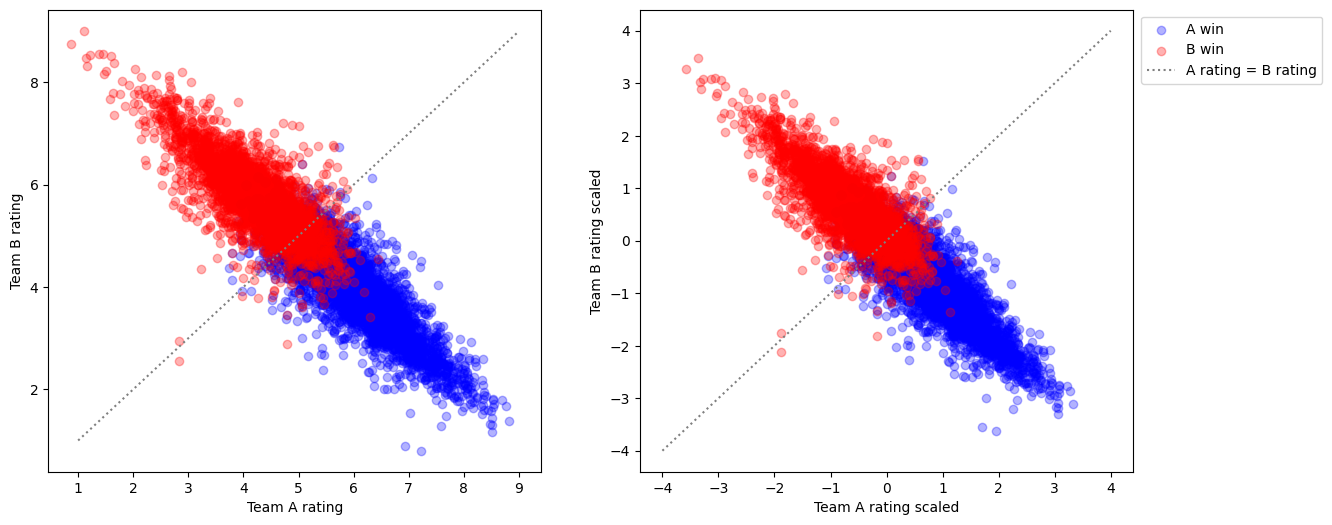

In [44]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(1,10), range(1,10), linestyle="dotted", color="grey", label="A rating = B rating")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")

# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 2, 2)
 
plt.scatter(
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating.to_numpy().reshape(-1,1)),
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating.to_numpy().reshape(-1,1)),
    c="blue",
    alpha=alpha,
    label="A win"
)

plt.scatter(
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating.to_numpy().reshape(-1,1)),
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating.to_numpy().reshape(-1,1)),
    c="red",
    alpha=alpha,
    label ="B win"
)

plt.plot(range(-4,5), range(-4,5), linestyle="dotted", color="grey", label="A rating = B rating")
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

plt.xlabel("Team A rating scaled")
plt.ylabel("Team B rating scaled")
 
plt.show()

In [45]:
print("mean of team A win:", np.mean(final_rating_df.Team_A_win))
print("mean of team B win:", np.mean(final_rating_df.Team_B_win))

mean of team A win: 0.5874658780709736
mean of team B win: 0.41173794358507737


In [46]:
lr = LogisticRegression()
X = final_rating_df[["Team_A_rating", "Team_B_rating"]]
y = final_rating_df.Team_A_win.to_numpy().reshape(-1,1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [49]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print("mean of true value:", np.mean(y_test))
print("mean of prediction:", np.mean(pred))
print("Accuracy:", acc)

mean of true value: 0.5873521383075523
mean of prediction: 0.586442220200182
Accuracy: 0.9062784349408554


/Users/ahram/miniforge3/envs/vct/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


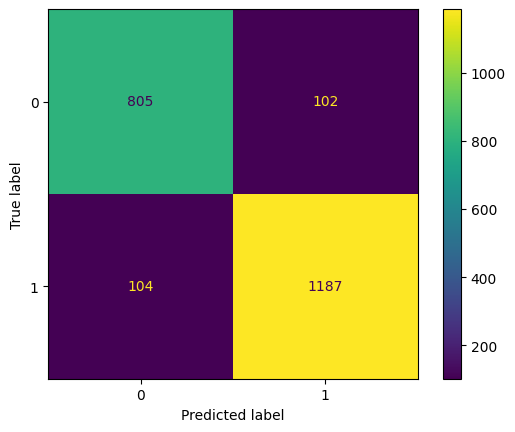

In [50]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
raise ValueError("Stop running here!")

Now, we want to only consider rating from earlier tournaments to predict later tournaments' outcome.

In [51]:
grouped_rating_df.Tournament.unique()

array(['Champions Tour Asia-Pacific Stage 1: Challengers Playoffs',
       'Champions Tour Asia-Pacific Stage 2: Challengers Playoffs',
       'Champions Tour Asia-Pacific: Last Chance Qualifier',
       'Champions Tour Brazil Stage 1: Challengers 1',
       'Champions Tour Brazil Stage 2: Challengers',
       'Champions Tour CIS Stage 1: Challengers 1',
       'Champions Tour CIS Stage 1: Challengers 2',
       'Champions Tour EMEA Stage 2: Challengers',
       'Champions Tour EMEA: Last Chance Qualifier',
       'Champions Tour East Asia: Last Chance Qualifier',
       'Champions Tour Europe Stage 1: Challengers 1',
       'Champions Tour Europe Stage 1: Challengers 2',
       'Champions Tour Hong Kong & Taiwan Stage 1: Challengers',
       'Champions Tour Hong Kong & Taiwan Stage 2: Challengers',
       'Champions Tour Indonesia Stage 1: Challengers',
       'Champions Tour Indonesia Stage 2: Challengers',
       'Champions Tour Japan Stage 1: Challengers Playoffs',
       'Champion

In [52]:
# The followings are the last 6 tournaments in 2022.
last_tournaments = {"Valorant Champions 2022",
                    "Champions Tour South America: Last Chance Qualifier",
                    "Champions Tour North America: Last Chance Qualifier",
                    "Champions Tour EMEA: Last Chance Qualifier",
                    "Champions Tour East Asia: Last Chance Qualifier",
                    "Champions Tour Asia-Pacific: Last Chance Qualifier"
                    }

# Check if each of last_tournaments is actually in our data.
alltournaments = set(grouped_rating_df.Tournament.unique())
for tournament in last_tournaments:
    if tournament not in alltournaments:
        print(f"{tournament} is not in our data or named differently.")

In [56]:
earlier_tournaments_index = grouped_rating_df["Tournament"].apply(lambda x: x not in last_tournaments)

earlier_grouped_rating_df = grouped_rating_df[earlier_tournaments_index]

earlier_grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3.300000
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,5.550000
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,3.750000
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,5.022993
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,5.437500
...,...,...,...,...,...,...,...
17698,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,3.860000
17699,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,6.860000
17700,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,3.912500
17701,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,6.210000


In [57]:
# Let's extract rating from ealier matches by simply taking average.

earlier_grouped_team_rating_df = earlier_grouped_rating_df.groupby(["Map","Team"])["Rating"].agg("mean").reset_index()

earlier_grouped_team_rating_df.head()

,Map,Team,Rating
0,Ascent,0Zero,5.685000
1,Ascent,100 Thieves,4.374000
2,Ascent,100paz,4.490000
3,Ascent,18again,3.610000
4,Ascent,19esports,5.975714


In [59]:
maps_scores_last_tournaments_index = maps_scores["Tournament"].apply(lambda x: x in last_tournaments)

last_tournaments_maps_scores_2022 = maps_scores[maps_scores_last_tournaments_index]

last_tournaments_maps_scores_2022.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,True,EDward Gaming,11,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,False,EDward Gaming,13,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,True,Team Liquid,10,False


In [62]:
chams_2022_team_rating =\
      last_tournaments_maps_scores_2022.set_index(['Map', 'Team A'])\
                        .join(earlier_grouped_team_rating_df\
                              .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                              .set_index(['Map', 'Team A'])\
                        )\
                        .reset_index()\
                        .set_index(['Map', 'Team B'])\
                        .join(earlier_grouped_team_rating_df\
                              .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                              .set_index(['Map', 'Team B'])\
                        )\
                        .reset_index()\
                        


In [63]:
chams_2022_team_rating["Team_A_rating"] = chams_2022_team_rating.groupby(["Team A"])["Team_A_rating"].transform(lambda x: x.fillna(x.mean()))
chams_2022_team_rating["Team_B_rating"] = chams_2022_team_rating.groupby(["Team B"])["Team_B_rating"].transform(lambda x: x.fillna(x.mean()))

In [74]:
chams_2022_team_rating.isna().sum()

Map               0
Team B            0
Team A            0
Tournament        0
Stage             0
Match Type        0
Match Name        0
Team A Score      0
Team_A_win        0
Team B Score      0
Team_B_win        0
Team_A_rating    13
Team_B_rating    14
dtype: int64

In [78]:
A_rating_mean = chams_2022_team_rating["Team_A_rating"].mean()
B_rating_mean = chams_2022_team_rating["Team_B_rating"].mean()

chams_2022_team_rating["Team_A_rating"].fillna(value=A_rating_mean, inplace=True)
chams_2022_team_rating["Team_B_rating"].fillna(value=B_rating_mean, inplace=True)

In [79]:
chams_2022_team_rating.head()

,Map,Team B,Team A,Tournament,Stage,Match Type,Match Name,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Ascent,100 Thieves,FaZe Clan,Champions Tour North America: Last Chance Qual...,Main Event,Upper Semifinals,FaZe Clan vs 100 Thieves,13,True,9,False,5.690000,4.374000
1,Ascent,100 Thieves,FaZe Clan,Champions Tour North America: Last Chance Qual...,Main Event,Lower Final,FaZe Clan vs 100 Thieves,3,False,13,True,5.690000,4.374000
2,Ascent,100 Thieves,NRG Esports,Champions Tour North America: Last Chance Qual...,Main Event,Upper Quarterfinals,NRG Esports vs 100 Thieves,11,False,13,True,5.669167,4.374000
3,Ascent,9z Team,Ninjas In Pyjamas,Champions Tour South America: Last Chance Qual...,Main Event,Upper Quarterfinals,Ninjas In Pyjamas vs 9z Team,13,True,4,False,5.232955,5.210000
4,Ascent,BBL Esports,Team Liquid,Champions Tour EMEA: Last Chance Qualifier,Main Event,Upper Quarterfinals,Team Liquid vs BBL Esports,13,True,11,False,5.079000,5.443636


In [65]:
train_index = final_rating_df["Tournament"].apply(lambda x: x not in last_tournaments)

In [80]:
lr2 = LogisticRegression()


W_train = final_rating_df[train_index][["Team_A_rating", "Team_B_rating"]]
z_train = final_rating_df[train_index].Team_A_win.to_numpy().reshape(-1,1)

W_test = chams_2022_team_rating[["Team_A_rating", "Team_B_rating"]]
z_test = chams_2022_team_rating.Team_A_win.to_numpy().reshape(-1,1)

In [81]:
chams_2022_team_rating.Team_A_win.isna().sum()

0

In [82]:
lr2.fit(W_train, z_train)
pred2 = lr2.predict(W_test)
acc2 = accuracy_score(z_test, pred2)
print("mean of true values:", np.mean(z_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)

mean of true values: 0.5518518518518518
mean of prediction: 0.5925925925925926
Accuracy: 0.5370370370370371


/Users/ahram/miniforge3/envs/vct/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


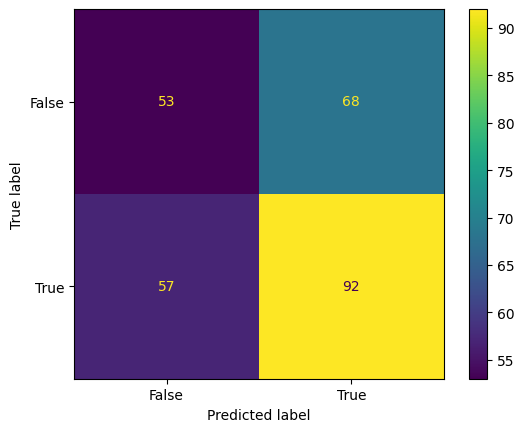

In [83]:
cm2 = confusion_matrix(z_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()